In [89]:
from math import *
import numpy as np
import sys


def DTW(A, B, window=sys.maxsize, d=lambda x, y: abs(x - y)):
    # 비용 행렬 초기화
    A, B = np.array(A), np.array(B)
    M, N = len(A), len(B)
    cost = sys.maxsize * np.ones((M, N))

    # 첫번째 로우,컬럼 채우기
#     print("첫 번째 로우 채우기")
    cost[0, 0] = d(A[0], B[0])
#     print("cost [0,0] : {}".format(d(A[0], B[0])))
    for i in range(1, M):
#         print("{} - {}".format(A[i], B[0]))
#         print("cost [{},0] : {}".format(i, cost[i - 1, 0] + d(A[i], B[0])))
        cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j - 1] + d(A[0], B[j])
    # 나머지 행렬 채우기
    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window)):
            choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
        cost[i, j] = min(choices) + d(A[i], B[j])

    # 최적 경로 구하기
    n, m = N - 1, M - 1
    path = []

    while (m, n) != (0, 0):
        path.append((m, n))
        m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

        path.append((0, 0))
    return cost[-1, -1], path

import matplotlib.pyplot as plt


A = np.array([1,2,3,4,2,3])
B = np.array([7,8,5,9,11,9])

cost, path = DTW(A, B, window = 6)

print(cost)
print(path)
# offset = 5
# plt.xlim([-1, max(len(A), len(B)) + 1])
# plt.plot(A)
# plt.plot(B + offset)
# for (x1, x2) in path:
#     plt.plot([x1, x2], [A[x1], B[x2] + offset])
#     plt.show()

66.0
[(5, 5), (0, 0), (4, 5), (0, 0), (3, 5), (0, 0), (2, 5), (0, 0), (1, 5), (0, 0), (0, 4), (0, 0), (0, 3), (0, 0), (0, 2), (0, 0), (0, 1), (0, 0)]


In [127]:
# Mongo 연결
from pymongo import MongoClient as mc
import random
import pprint as pp

mongo_uri = "mongodb://localhost:27017"
client = mc(mongo_uri)

keti_pr_db = client.keti_pattern_recognition
household_col = keti_pr_db.household_info

total = household_col.count()
db_datas = list(household_col.\
                find().skip(random.randrange(0,total)).limit(1))[0]
# db_datas = household_col.\
#                 find_one({
#                     "uid": "아파트4-103-606"
#                 })

client.close()

<ipython-input-127-e51e7d2a51b9>:12: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  total = household_col.count()


In [128]:
# require module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

In [129]:
# custom module
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import custom.supports as sp
import custom.mapgenerator as mg
import custom.dateutils as du

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
SEASONS = {
    "봄" : [3, 4, 5],
    "여름" : [6, 7, 8],
    "가을" : [9, 10, 11],
    "겨울" : [12, 1, 2]
}

SEASONSARR = ['봄','여름','가을','겨울']

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''

DAYARR = ["월", "화", "수", "목", "금", "토", "일"]

uid, timeslot = db_datas['uid'], db_datas['timeslot']

print("{} pattern recognition".format(uid))

datelist = [
    dt.strptime(ts['time'], "%Y-%m-%d T%H:%M %z").date()
    for ts in timeslot
]
datelist = list(set(datelist))
datelist.sort()

ts_datas = {}
start_idx = 0
end_idx = 96

for date in datelist:
    ts_datas[date] = [ ts['power'] for ts in timeslot[start_idx:end_idx]]
    start_idx = end_idx
    end_idx = end_idx + 96

ts_datas = pd.DataFrame(ts_datas).T
datas = ts_datas.reset_index().copy()

datas.rename(columns={"index": "date"}, inplace=True)
datas['date'] = pd.to_datetime(datas['date'])
datas['month'] = [dt.month for dt in datas['date']]
datas = [
    datas[(datas['month'].isin(SEASONS[season]))].copy()
    for season in SEASONSARR
]

bak_datas = datas.copy()

season_datas = {
    "봄": datas[0].copy(),
    "여름": datas[1].copy(),
    "가을": datas[2].copy(),
    "겨울": datas[3].copy()
}

season_datas["봄"]

아파트3-103-707 pattern recognition


,date,0,1,2,3,4,5,6,7,8,...,87,88,89,90,91,92,93,94,95,month
0,2018-05-01,0.035,0.043,0.065,0.045,0.032,0.046,0.066,0.054,0.036,...,0.036,0.067,0.053,0.023,0.040,0.071,0.047,0.026,0.055,5
1,2018-05-02,0.061,0.037,0.031,0.055,0.060,0.040,0.025,0.059,0.071,...,0.054,0.065,0.053,0.028,0.051,0.078,0.036,0.026,0.068,5
2,2018-05-03,0.056,0.023,0.035,0.074,0.043,0.029,0.051,0.072,0.027,...,0.050,0.064,0.034,0.019,0.066,0.061,0.024,0.032,0.077,5
3,2018-05-04,0.076,0.076,0.043,0.069,0.058,0.053,0.041,0.075,0.040,...,0.099,0.060,0.046,0.074,0.092,0.051,0.042,0.092,0.074,5
4,2018-05-05,0.051,0.051,0.093,0.061,0.047,0.068,0.090,0.050,0.058,...,0.068,0.055,0.037,0.033,0.073,0.044,0.026,0.058,0.067,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-04-26,0.050,0.108,0.104,0.076,0.099,0.126,0.080,0.088,0.109,...,0.044,0.066,0.086,0.082,0.079,0.075,0.085,0.031,0.061,4
361,2019-04-27,0.090,0.073,0.098,0.125,0.065,0.086,0.074,0.079,0.051,...,0.102,0.085,0.037,0.065,0.084,0.049,0.047,0.056,0.082,4
362,2019-04-28,0.045,0.043,0.058,0.073,0.059,0.037,0.059,0.087,0.046,...,0.152,0.096,0.078,0.107,0.111,0.092,0.073,0.104,0.122,4
363,2019-04-29,0.069,0.059,0.102,0.078,0.061,0.075,0.090,0.074,0.069,...,0.067,0.094,0.088,0.055,0.067,0.098,0.078,0.073,0.059,4


In [302]:
# DTW 가격이 낮을수록 비슷하다는 의미가 된다.

spring = season_datas['봄'].copy()
del spring['month']
dates = spring['date'].values

spring.set_index('date', inplace=True)

check_date = dates[60]
check_date

dtw_arr = pd.DataFrame(columns=["cost"])
for date in dates:
    if check_date == date:
        continue    
    cost, path = DTW(spring.loc[date].values, spring.loc[check_date], window = 96)
    dtw_arr.loc[date] = [cost]

dtw_arr.sort_values(by=['cost'])

,cost
2018-05-11,4.260
2018-05-04,4.264
2018-05-22,4.324
2019-04-29,4.330
2018-05-10,4.415
...,...
2019-03-12,7.358
2018-05-06,7.366
2018-05-15,7.536
2019-04-15,7.568


In [303]:
from scipy.spatial import distance

from numpy import dot
from numpy.linalg import norm
import numpy as np
from scipy.spatial import distance
def cos_sim(A,B):
    return dot(A,B)/(norm(A) * norm(B))

check_idx = 40
good = dtw_arr.sort_values(by=['cost']).index[check_idx]
cost = dtw_arr.loc[good].values[0]

print(cost)

4.981999999999997


Text(0.5, 1.0, 'Check Sequence : 40,  DTW: 4.981999999999997,  Distance: 0.2973079211860996,  Similarity: 0.9393457574346387  ')

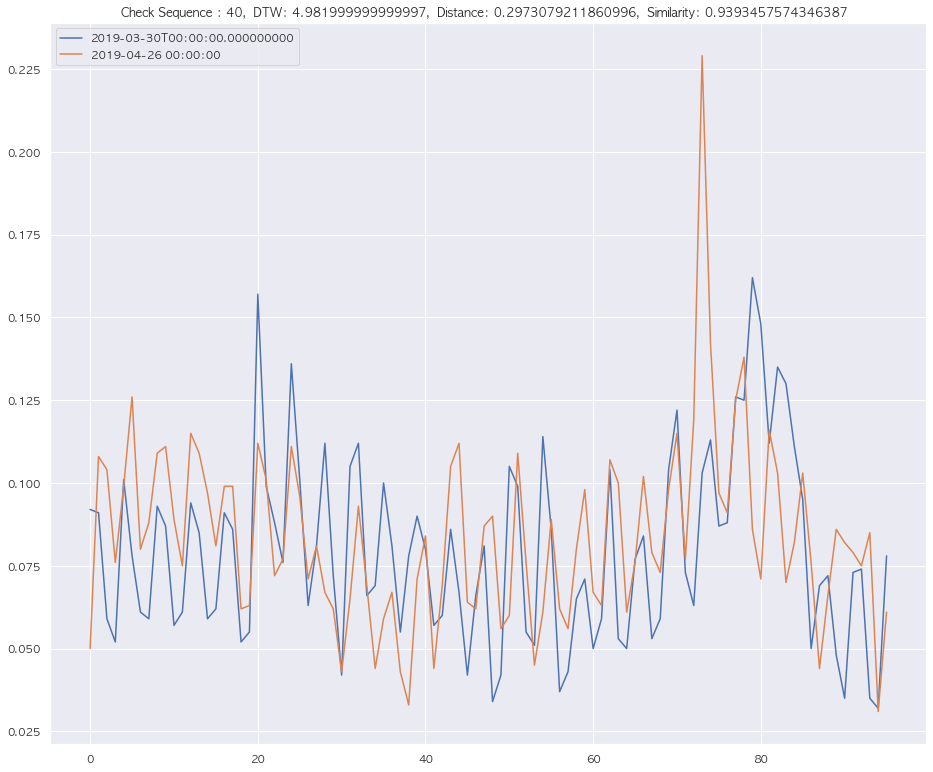

In [304]:
e_1 = spring.loc[check_date].values
e_2 = spring.loc[good].values

sns.lineplot(data=e_1, label=check_date)
sns.lineplot(data=e_2, label=good)
plt.title("Check Sequence : {},  \
DTW: {},  \
Distance: {},  \
Similarity: {}  ".format(check_idx, cost,distance.euclidean(e_1, e_2), cos_sim(e_1, e_2)))

In [305]:
e_1 = spring.loc[check_date].values

dtw_arr_2 = dtw_arr.copy()
dtw_arr_2['distance'] = [ distance.euclidean(e_1, dtw_arr_2.loc[date].values) for date in dtw_arr_2.index ]
dtw_arr_2

similar_arr = []
for date in dtw_arr_2.index:
    similar_arr.append(cos_sim(e_1,spring.loc[date].values))

dtw_arr_2['similar'] = similar_arr
dtw_arr_2

,cost,distance,similar
2018-05-01,6.969,67.501667,0.921362
2018-05-02,4.885,47.082967,0.849314
2018-05-03,5.151,49.689181,0.859997
2018-05-04,4.264,40.998555,0.914168
2018-05-05,5.508,53.187002,0.903975
...,...,...,...
2019-04-26,4.982,48.033353,0.939346
2019-04-27,4.790,46.152177,0.895238
2019-04-28,6.101,58.997121,0.894932
2019-04-29,4.330,41.645206,0.935040


In [306]:
dtw_arr_2.sort_values(by=["cost"])

,cost,distance,similar
2018-05-11,4.260,40.959364,0.906986
2018-05-04,4.264,40.998555,0.914168
2018-05-22,4.324,41.586420,0.926437
2019-04-29,4.330,41.645206,0.935040
2018-05-10,4.415,42.478015,0.904080
...,...,...,...
2019-03-12,7.358,71.313043,0.886785
2018-05-06,7.366,71.391426,0.895753
2018-05-15,7.536,73.057067,0.873051
2019-04-15,7.568,73.370599,0.910236


In [307]:
dtw_arr_2.sort_values(by=["distance"])

,cost,distance,similar
2018-05-11,4.260,40.959364,0.906986
2018-05-04,4.264,40.998555,0.914168
2018-05-22,4.324,41.586420,0.926437
2019-04-29,4.330,41.645206,0.935040
2018-05-10,4.415,42.478015,0.904080
...,...,...,...
2019-03-12,7.358,71.313043,0.886785
2018-05-06,7.366,71.391426,0.895753
2018-05-15,7.536,73.057067,0.873051
2019-04-15,7.568,73.370599,0.910236


In [308]:
dtw_arr_2.sort_values(by=["similar"], ascending=False)

,cost,distance,similar
2019-03-18,6.411,62.034456,0.945135
2019-04-03,5.196,50.130083,0.944660
2019-04-05,4.922,47.445485,0.939830
2019-04-26,4.982,48.033353,0.939346
2019-04-18,5.336,51.501777,0.935338
...,...,...,...
2018-05-03,5.151,49.689181,0.859997
2019-03-17,4.851,46.749842,0.859822
2019-04-19,4.622,44.506151,0.856693
2018-05-02,4.885,47.082967,0.849314


In [309]:
good_dtw = dtw_arr_2.sort_values(by=["cost"]).index[0]
good_dis = dtw_arr_2.sort_values(by=["distance"]).index[0]
good_sim = dtw_arr_2.sort_values(by=["similar"], ascending=False).index[0]

<AxesSubplot:>

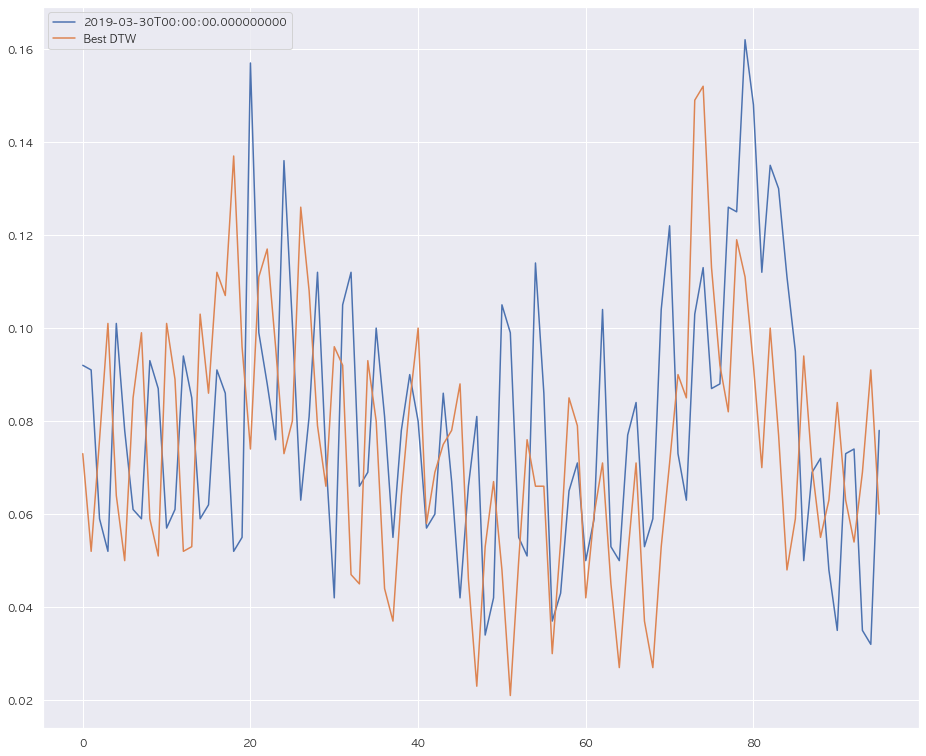

In [310]:
e_1 = spring.loc[check_date].values
e_2 = spring.loc[good_dtw].values
e_3 = spring.loc[good_dis].values
e_4 = spring.loc[good_sim].values

sns.lineplot(data=e_1, label=check_date)
sns.lineplot(data=e_2, label="Best DTW")
# plt.title("Check Sequence : {},  \
# GOOD_DTW: {},  \
# Distance: {},  \
# Similarity: {}  ".format(check_idx, cost,distance.euclidean(e_1, e_2), cos_sim(e_1, e_2)))

<AxesSubplot:>

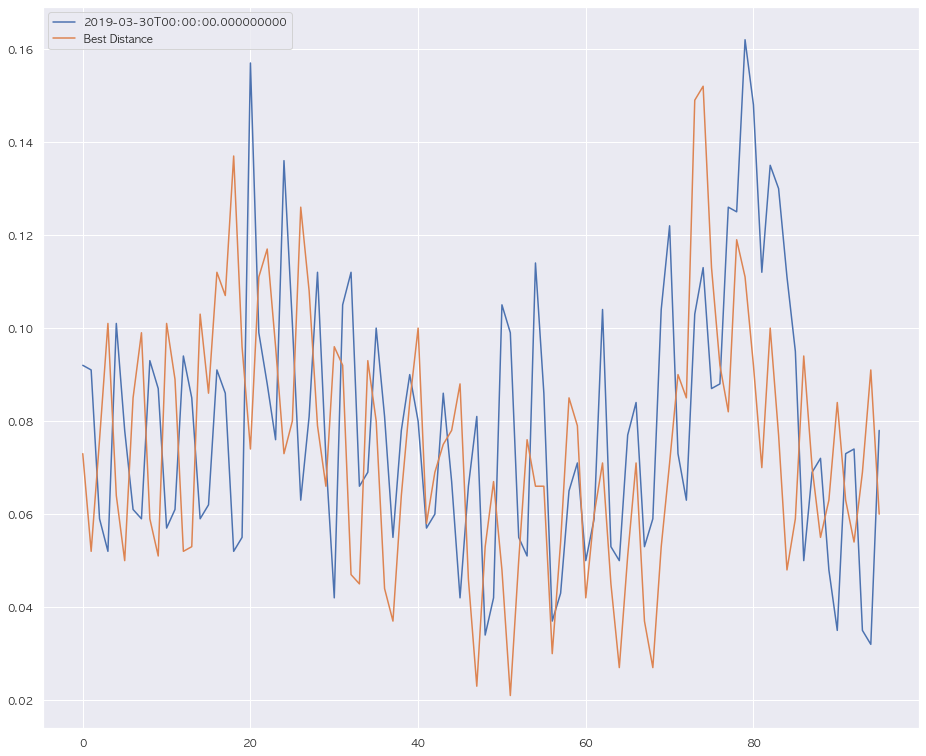

In [311]:
sns.lineplot(data=e_1, label=check_date)
sns.lineplot(data=e_3, label="Best Distance")

<AxesSubplot:>

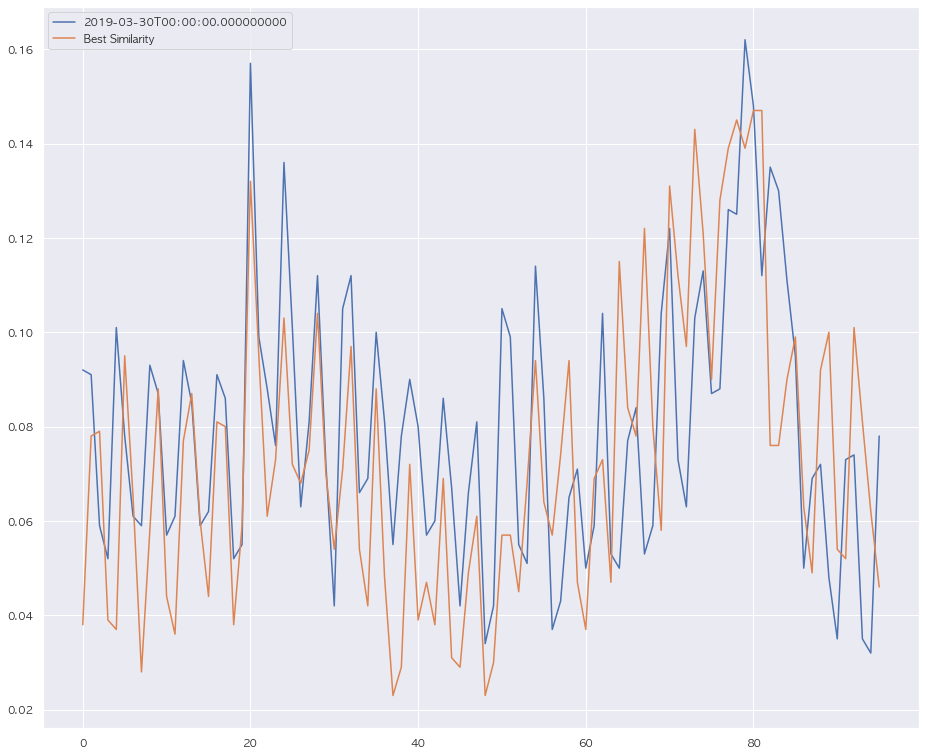

In [312]:
sns.lineplot(data=e_1, label=check_date)
sns.lineplot(data=e_4, label="Best Similarity")

In [313]:
dtw_arr_2.sort_values(by=["cost", "distance", "similar"], ascending=[True, True, False])

,cost,distance,similar
2018-05-11,4.260,40.959364,0.906986
2018-05-04,4.264,40.998555,0.914168
2018-05-22,4.324,41.586420,0.926437
2019-04-29,4.330,41.645206,0.935040
2018-05-10,4.415,42.478015,0.904080
...,...,...,...
2019-03-12,7.358,71.313043,0.886785
2018-05-06,7.366,71.391426,0.895753
2018-05-15,7.536,73.057067,0.873051
2019-04-15,7.568,73.370599,0.910236
